In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import discriminant_analysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

## Datos

In [2]:
data = pd.read_csv('alzheimers_disease_data.csv')
df = data.drop(['PatientID', 'DoctorInCharge'], axis=1)
df = pd.get_dummies(df, columns=['Ethnicity', 'EducationLevel'])
df.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3
0,73,0,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,...,0,0,1,0,0,0,0,0,1,0
1,89,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,...,1,0,1,0,0,0,1,0,0,0
2,73,0,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,...,0,0,0,0,0,1,0,1,0,0
3,74,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,...,0,0,1,0,0,0,0,1,0,0
4,89,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,...,0,0,1,0,0,0,1,0,0,0


In [3]:
target = 'Diagnosis'
X = df.drop(target, axis=1)
y = df[target]

## Modelos

### Regresión Logistica

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

probabilidades1 = model.predict_proba(X_test)[:, 1]

C:\Users\Alejandro\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Coeficientes

In [5]:
Coef = pd.DataFrame ({
    'variables' : X_train.keys(),
    'coeficientes' : model.coef_[0]
})
Coef

,variables,coeficientes
0,Age,0.017201
1,Gender,0.134720
2,BMI,-0.018813
3,Smoking,-0.017406
4,AlcoholConsumption,-0.041123
5,PhysicalActivity,-0.029839
6,DietQuality,0.068913
7,SleepQuality,-0.095320
8,FamilyHistoryAlzheimers,-0.023931
9,CardiovascularDisease,0.066174


En el caso de los coeficientes de la regresión polinomial podemos ver que los que más afectan a nuestro modelo de regresión son:
* MemoryComplain : 0.9142
* BehavioralProblems : 0.6093

Después de observar los que más nos afectan y ver el que le sigue de ellos que es Gender de 0.1347, se puede determinar que los dos coeficientes de arriba tienen un peso muy grande en la regresión logistica, siendo fundamentales para nuestro modelo. También es importante mencionar que dentro de las variables hay coeficientes negativos, lo que quiere decir que estos son aquellos que nos perjudican a nuetsro modelo. 

### Polinomial Grado 2

In [6]:
pipeline = Pipeline([
    ('Scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('model', linear_model.LogisticRegression(penalty='l2'))
])

pipeline.fit(X_train, y_train)

probabilidades2 = pipeline.predict_proba(X_test)[:, 1]

C:\Users\Alejandro\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Polinomial Grado 3

In [7]:
pipeline = Pipeline([
    ('Scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=3)),
    ('model', linear_model.LogisticRegression(penalty='l2'))
])

pipeline.fit(X_train, y_train)

probabilidades3 = pipeline.predict_proba(X_test)[:, 1]

C:\Users\Alejandro\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

vecinos = []
AUC = []
for i in range(1, 100):
    model = neighbors.KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled, y_train)
    probabilidades_knn = model.predict_proba(X_test_scaled)[:, 1]
    vecinos.append(i)
    AUC.append(roc_auc_score(y_score=probabilidades_knn, y_true=y_test))
     
nn = pd.DataFrame({
    'AUC': AUC, 
    'vecinos': vecinos
})

df_nv = nn
nv_opt = df_nv.loc[df_nv['AUC'].idxmax()]
print(nv_opt)

AUC         0.857406
vecinos    99.000000
Name: 98, dtype: float64


### Discriminante lineal

In [9]:
pipeline = Pipeline([
    ('Scaler', StandardScaler()),
    ('model', discriminant_analysis.LinearDiscriminantAnalysis())
])

pipeline.fit(X_train, y_train)

probabilidades_disc = pipeline.predict_proba(X_test)[:, 1]

## Dataset probabilidades

In [10]:
df_todo = pd.DataFrame({
    'real' : y_test,
    'logistica1' : probabilidades1,
    'logistica2' : probabilidades2,
    'logistica3' : probabilidades3,
    'probabilidades_disc': probabilidades_disc,
    'knn': probabilidades_knn 
})

df_todo.head()

,real,logistica1,logistica2,logistica3,probabilidades_disc,knn
1159,0,0.059520,6.551131e-12,4.117689e-07,0.013735,0.222222
1822,0,0.475682,1.161886e-05,2.897148e-02,0.153149,0.202020
978,0,0.124084,3.727678e-01,1.573301e-01,0.159469,0.343434
759,0,0.351036,1.857055e-05,1.327176e-05,0.078635,0.252525
874,0,0.004857,2.761389e-11,1.667646e-09,0.001993,0.161616


In [11]:
df_todo['bins1']= pd.qcut(df_todo['logistica1'], q=10, labels=False)+1
df_todo['bins2']= pd.qcut(df_todo['logistica2'], q=10, labels=False)+1
df_todo['bins3']= pd.qcut(df_todo['logistica3'], q=10, labels=False)+1
df_todo['bins_knn']= pd.qcut(df_todo['knn'], q=10, labels=False)+1
df_todo['bins_disc']= pd.qcut(df_todo['probabilidades_disc'], q=10, labels=False)+1




grouped1 = df_todo.groupby('bins1').mean()
grouped2 = df_todo.groupby('bins2').mean()
grouped3 = df_todo.groupby('bins3').mean()
grouped_knn = df_todo.groupby('bins_knn').mean()
grouped_disc = df_todo.groupby('bins_disc').mean()






### Calibraciones

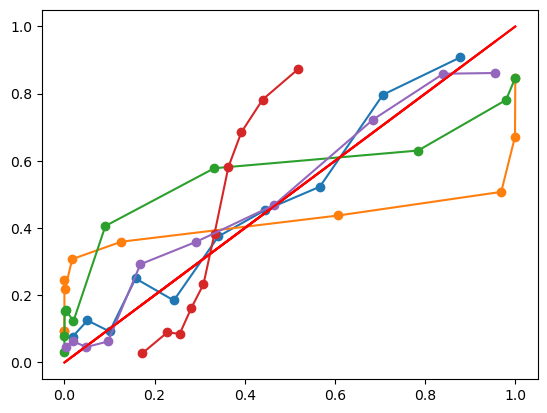

In [12]:
plt.plot(grouped1.logistica1, grouped1.real, marker='o')
plt.plot(grouped1.logistica1, grouped1.logistica1, color='red')


plt.plot(grouped2.logistica2, grouped2.real, marker='o')
plt.plot(grouped2.logistica2, grouped2.logistica2, color='red')

plt.plot(grouped3.logistica3, grouped3.real, marker='o')
plt.plot(grouped3.logistica3, grouped3.logistica3, color='red')

plt.plot(grouped_knn.knn, grouped_knn.real, marker='o')
plt.plot(grouped_knn.knn, grouped_knn.knn, color='red')


plt.plot(grouped_disc.probabilidades_disc, grouped_disc.real, marker='o')
plt.plot(grouped_disc.probabilidades_disc, grouped_disc.probabilidades_disc, color='red')


### Histogramas

In [13]:
real1 = df_todo[df_todo['real'] == 1]
real0 = df_todo[df_todo['real'] == 0]

#### Regresión Logística

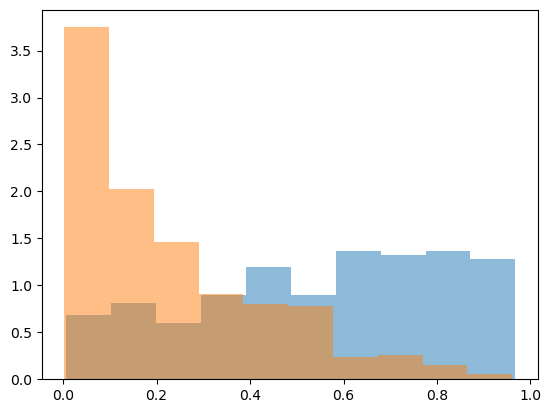

In [14]:
plt.hist(real1.logistica1, density=True, alpha=0.5, bins=10)
plt.hist(real0.logistica1, density=True, alpha=0.5, bins=10)
plt.show()

#### Polinomial Grado 2

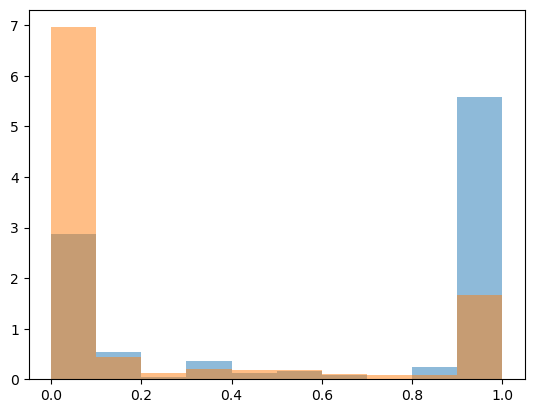

In [15]:
plt.hist(real1.logistica2, density=True, alpha=0.5, bins=10)
plt.hist(real0.logistica2, density=True, alpha=0.5, bins=10)
plt.show()

#### Polinomial Grado 3

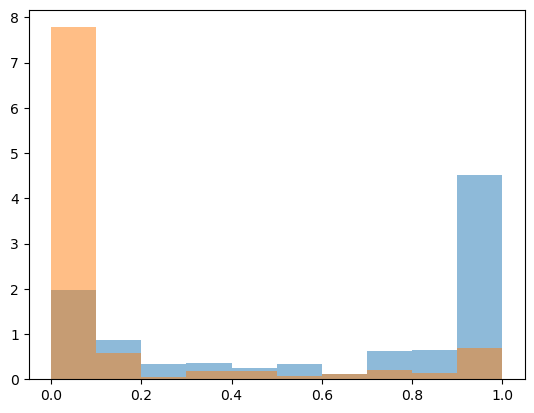

In [16]:
plt.hist(real1.logistica3, density=True, alpha=0.5, bins=10)
plt.hist(real0.logistica3, density=True, alpha=0.5, bins=10)
plt.show()

#### KNN

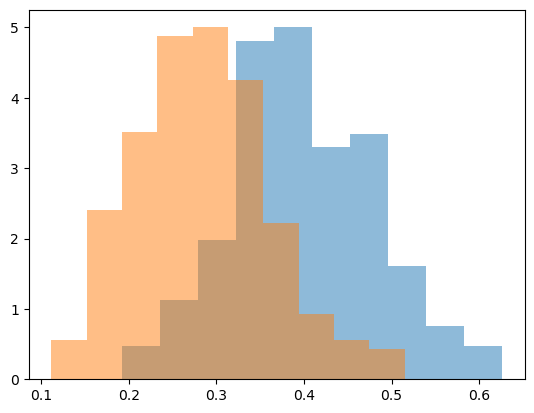

In [17]:
plt.hist(real1.knn, density=True, alpha=0.5, bins=10)
plt.hist(real0.knn, density=True, alpha=0.5, bins=10)
plt.show()

#### Discriminante Lineal

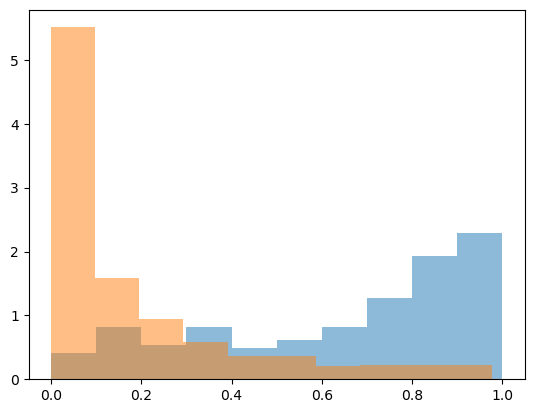

In [18]:
plt.hist(real1.probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.hist(real0.probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.show()

### AUC y Curva ROC

#### Rregresión Lineal

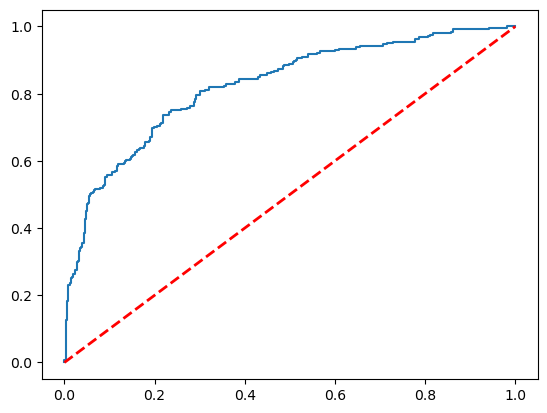

In [19]:
fpr, fnp, scores = roc_curve(y_score = probabilidades1, y_true = y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')

#### Polinomial Grado 2

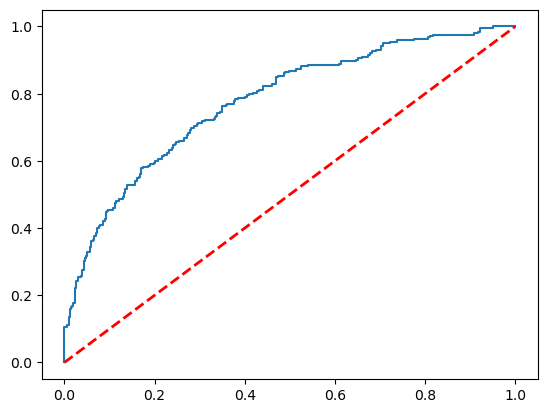

In [20]:
fpr, fnp, scores = roc_curve(y_score = probabilidades2, y_true = y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')

#### Polinomial Grado 3

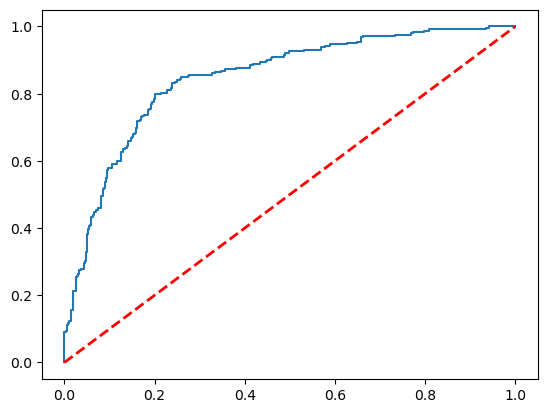

In [21]:
fpr, fnp, scores = roc_curve(y_score = probabilidades3, y_true = y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')

#### KNN

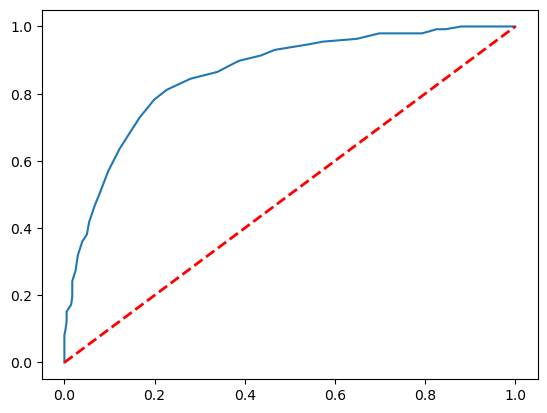

In [22]:
fpr, fnp, scores = roc_curve(y_score = probabilidades_knn, y_true = y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')

#### Discriminante Lineal

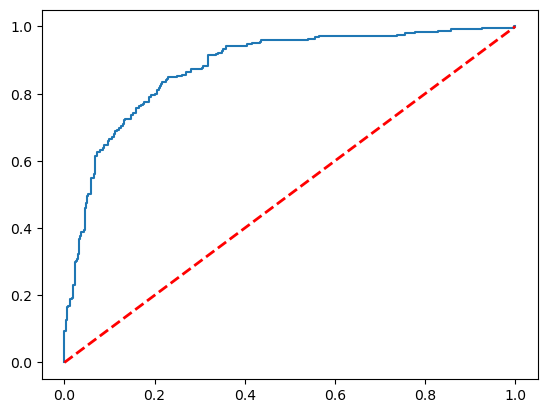

In [23]:
fpr, fnp, scores = roc_curve(y_score = probabilidades_disc, y_true = y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')

#### AUC y GINI

In [24]:
AUC1 = roc_auc_score(y_score=probabilidades1, y_true=y_test)
AUC2 = roc_auc_score(y_score=probabilidades2, y_true=y_test)
AUC3 = roc_auc_score(y_score=probabilidades3, y_true=y_test)
AUC_KNN = roc_auc_score(y_score=probabilidades_knn, y_true=y_test)
AUC_Disc = roc_auc_score(y_score=probabilidades_disc, y_true=y_test)

GINI1 = 2*roc_auc_score(y_score=probabilidades1, y_true=y_test)-1
GINI2 = 2*roc_auc_score(y_score=probabilidades2, y_true=y_test)-1
GINI3 = 2*roc_auc_score(y_score=probabilidades3, y_true=y_test)-1
GINI_KNN = 2*roc_auc_score(y_score=probabilidades_knn, y_true=y_test)-1
GINI_Disc = 2*roc_auc_score(y_score=probabilidades_disc, y_true=y_test)-1

In [25]:
AUC = pd.DataFrame({
    'AUC': [AUC1, AUC2, AUC3, AUC_KNN, AUC_Disc],
    'GINI': [GINI1, GINI2, GINI3, GINI_KNN, GINI_Disc]
}, index=['Logictica1', 'Polinomial2','Polinomial3', 'KNN', 'Discriminante_lineal' ])

AUC

,AUC,GINI
Logictica1,0.823270,0.646539
Polinomial2,0.777012,0.554025
Polinomial3,0.846766,0.693533
KNN,0.857406,0.714811
Discriminante_lineal,0.879533,0.759065


## Conclusión

Tras haber hecho todos los modelos, tanto la regresión logistica normal, las polinomiales grado 2 y grado 3, KNN y discriminante lineal, podemos concluir que el mejor modelo para predecir si tendrá alguien Alzheimer o no es el discriminante lineal con un AUC de 0.8795, siendo este el mayor de todos. 

Esto se puede corroborar tanto con la grafica de calibración que es la que mejor se ajusta a la linea de tendencia de los valores reales que se presentan; el histograma donde vemos que ambos lados se logran separara muy bien y hay pocos datos como intersección, siendo un claro ejemplo de que hay buenas predicciones; y, por la curva ROC, donde vemos una gran curva que abarca mucho espacio de la parte superior de la grafica, lo cual es lo óptimo cuando se busca un buen modelo. 

Asimismo, podemos ver que en el GINI, este modelo es el mayor, con un 0.7590, lo que nos indica que el 75.90% el modelo explica correctamente cuando una persona tendrá Alzheimer y cuando no. 